# Dominik Strzałko - Zadanie 4 i 5.2 - 434788

# Do zadania **5_2** - Podpunkt **3.3** i **4.2**

---



---



---



---



# **Część 0.** Pobranie i analiza zbioru
---

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('gratkapl-centrenrm.csv')

In [3]:
df

,Id,Price,Rooms,SqrMeters,Floor,Location,Centre,Description
0,3914,386064,2,46.00,3,Poznań Stare Miasto Wilda ul. Maratońska Łęgi ...,1,OFERTA ZWOLNIONA Z PROWIZJI OD KUPUJĄCEGO! OFE...
1,437,280000,2,41.00,5,Poznań Poznań-Wilda,0,Polecam do sprzedaży mieszkanie dwupokojowe pr...
2,1139,329000,2,50.50,1,Poznań Ogrody,0,Polecam na sprzedaż mieszkanie 2-pokojowe na p...
3,4377,225000,2,43.00,10,Poznań Grunwald Łazarz Górczyn Ogrody Je ul. N...,1,BEZPIECZNA TRANSAKCJA JEDYNIE Z DOŚWIADCZONYM ...
4,192,280000,2,69.00,3,Poznań Wilda ul. Traugutta,0,Salon nieruchomości Iron House poleca na sprze...
...,...,...,...,...,...,...,...,...
2013,128,277000,2,46.10,3,Poznań Naramowice Piątkowo Winogrady ul. Sielawy,0,Kupując z pośrednikiem - kupujesz bezpiecznie ...
2014,484,371000,3,47.00,2,Poznań Łazarz ul. Grottgera 15/19,0,Najbardziej Prestiżowy Adres w Poznaniu!! Prze...
2015,795,341600,2,61.00,1,Poznań Poznań-Grunwald ul. Jana Matejki,0,Oferta sprzedaży mieszkania o łącznej powierzc...
2016,1562,149000,1,28.00,3,Poznań Dębiec,0,Kawalerka 28m2 na Dębcu SUPER CENA !!!! Poleca...


In [4]:
df.head()

,Id,Price,Rooms,SqrMeters,Floor,Location,Centre,Description
0,3914,386064,2,46.0,3,Poznań Stare Miasto Wilda ul. Maratońska Łęgi ...,1,OFERTA ZWOLNIONA Z PROWIZJI OD KUPUJĄCEGO! OFE...
1,437,280000,2,41.0,5,Poznań Poznań-Wilda,0,Polecam do sprzedaży mieszkanie dwupokojowe pr...
2,1139,329000,2,50.5,1,Poznań Ogrody,0,Polecam na sprzedaż mieszkanie 2-pokojowe na p...
3,4377,225000,2,43.0,10,Poznań Grunwald Łazarz Górczyn Ogrody Je ul. N...,1,BEZPIECZNA TRANSAKCJA JEDYNIE Z DOŚWIADCZONYM ...
4,192,280000,2,69.0,3,Poznań Wilda ul. Traugutta,0,Salon nieruchomości Iron House poleca na sprze...


In [5]:
df.iloc[0,-1]

'OFERTA ZWOLNIONA Z PROWIZJI OD KUPUJĄCEGO! OFERTA 0%! Oferta z rynku pierwotnego. Dostępne mieszkania w metrażach od 39 m2 do 142 m2. Nowoczesna inwestycja zlokalizowana w atrakcyjnym punkcie Poznania znakomicie skomunikowanym z pozostałymi...'

In [6]:
df.dtypes

Id               int64
Price            int64
Rooms            int64
SqrMeters      float64
Floor            int64
Location        object
Centre           int64
Description     object
dtype: object

In [7]:
df.describe(include='all')

,Id,Price,Rooms,SqrMeters,Floor,Location,Centre,Description
count,2018.000000,2.018000e+03,2018.000000,2018.000000,2018.000000,2018,2018.000000,2018
unique,NaN,NaN,NaN,NaN,NaN,1152,NaN,1652
top,NaN,NaN,NaN,NaN,NaN,Poznań Winogrady ul. Hawelańska,NaN,Nieruchomości Mieszkania Nieruchomości Mieszkania
freq,NaN,NaN,NaN,NaN,NaN,107,NaN,174
mean,1249.945986,3.694764e+05,2.442022,57.465203,2.897919,NaN,0.256690,NaN
std,1091.231791,1.247583e+06,0.934577,24.339514,2.414320,NaN,0.436915,NaN
min,1.000000,1.000000e+00,1.000000,14.370000,1.000000,NaN,0.000000,NaN
25%,505.250000,2.366048e+05,2.000000,42.000000,1.000000,NaN,0.000000,NaN
50%,1009.500000,2.900000e+05,2.000000,51.000000,2.000000,NaN,0.000000,NaN
75%,1513.750000,3.590000e+05,3.000000,66.000000,4.000000,NaN,1.000000,NaN


### **0.1.** Sprawdzenie wartości odstających dla 'Price'

<Figure size 1440x432 with 0 Axes>

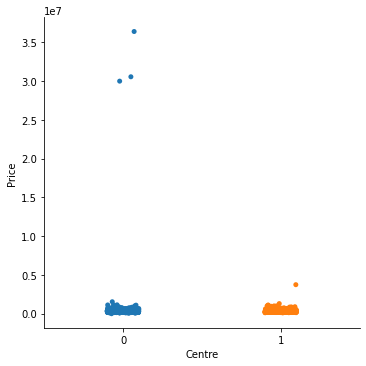

In [8]:
#Price,Rooms,SqrMeters,Floor
plt.figure(figsize=(20,6))
sns.catplot(x='Centre',y='Price', data=df )
plt.show()

In [9]:
df[df['Price']>=2500000]

,Id,Price,Rooms,SqrMeters,Floor,Location,Centre,Description
492,1174,29979840,2,54.40,4,Poznań Winogrady ul. Wilczak 20,0,Mieszkanie 2 pokojowe z aneksem kuchennym.
631,1315,30542880,1,31.52,1,Poznań Stare Miasto ul. Dominikańska,0,Zapraszamy do zapoznania się z nową inwestycją...
866,3621,3740000,6,219.78,3,Poznań,1,JEDYNY TAKI PENTHOUSE W POZNANIU! Centrum ale ...
1099,746,36378404,3,48.70,4,Poznań Winogrady ul. Wilczak 20,0,Mieszkanie 3 pokojowe z aneksem kuchennym.


### **0.2.** Sprawdzenie wartości odstających dla 'Rooms'

<Figure size 1440x432 with 0 Axes>

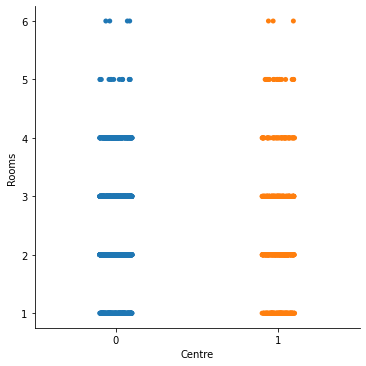

In [10]:
#Price,Rooms,SqrMeters,Floor
plt.figure(figsize=(20,6))
sns.catplot(x='Centre',y='Rooms', data=df )
plt.show()

### **0.3.** Sprawdzenie wartości odstających dla 'SqrMeters'

<Figure size 1440x432 with 0 Axes>

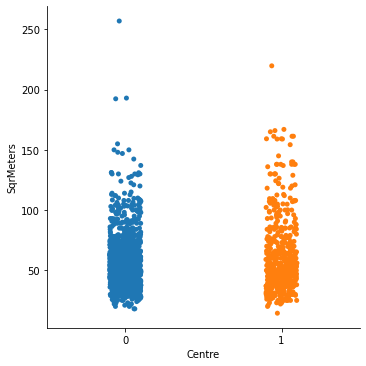

In [11]:
#Price,Rooms,SqrMeters,Floor
plt.figure(figsize=(20,6))
sns.catplot(x='Centre',y='SqrMeters', data=df )
plt.show()

In [12]:
df[df['SqrMeters']>=175]

,Id,Price,Rooms,SqrMeters,Floor,Location,Centre,Description
637,189,1140000,6,193.00,1,Poznań Naramowice ul. Błażeja,0,| Kontakt w sprawie oferty: Monika Celińska te...
805,1425,1100000,3,257.00,1,Poznań Jeżyce ul. Reja,0,OFERTA PROMOCYJNA - PROWIZJĘ W CAŁOŚCI POKRYWA...
866,3621,3740000,6,219.78,3,Poznań,1,JEDYNY TAKI PENTHOUSE W POZNANIU! Centrum ale ...
1618,940,1140000,6,192.40,1,Poznań Stare Miasto Naramowice,0,BARDZO ATRAKCYJNE DWUPOZIOMOWE MIESZKANIE Z OG...


### **0.4.** Sprawdzenie wartości odstających dla 'Floor'

<Figure size 1440x432 with 0 Axes>

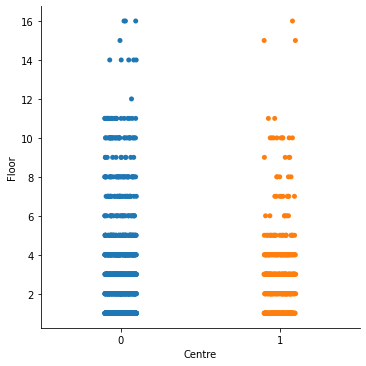

In [13]:
#Price,Rooms,SqrMeters,Floor
plt.figure(figsize=(20,6))
sns.catplot(x='Centre',y='Floor', data=df )
plt.show()

In [14]:
df[df['Floor']>=12]

,Id,Price,Rooms,SqrMeters,Floor,Location,Centre,Description
5,84,273000,3,79.0,14,Poznań Rataje Malta Starołęka Chartowo Śródk u...,0,Przedmiotem sprzedaży jest 3- pokojowe mieszka...
82,1446,259000,2,47.0,14,Poznań Piątkowo Winogrady Sołacz ul. Chrobrego...,0,POLECAM NA SPZREDAŻ 2 pokojowe z balkonem na 1...
291,4599,270000,3,66.5,15,Poznań Rataje Nowe Miasto ul. Os. Tysiąclecia,1,Funkcjonalne przytulne bardzo ładne dwupokojow...
347,1504,250000,3,49.0,15,Poznań Rataje Sródka ul. Tysiaclecia Os.,1,POLECAM NA SPRZEDAŻ Słoneczne mieszkanie na os...
483,501,349990,3,79.9,16,Poznań Stare Miasto Piątkowo ul. Osiedle Boles...,0,Wygodne 3-pokojowe mieszkanie na szesnastym pi...
586,1128,239000,2,57.0,14,Poznań Rataje ul. Os. Orła Białego 57M2,0,POLECAM!!! Mieszkanie 2 pokojowe z dodatkową z...
785,309,274000,3,77.0,16,Poznań Rataje Śródka Wilda Łazarz Zawady ul. A...,1,MIESZKANIE WOLNE OD ZARAZ!!! BEZPIECZNA TRANSA...
798,1688,274000,3,79.0,16,Poznań Rataje ul. Os.Armii Krajowej,0,Polecam na sprzedaż ładne 3 pokojowe mieszkani...
1483,1018,320000,3,78.0,16,Poznań Rataje ul. Os.Orła Białego,0,(BT)Polecam ofertę sprzedaży ładnego przestron...
1536,1496,265000,2,47.0,15,Poznań Winogrady Piątkowo Sołacz Naramowice ul...,0,Przedmiotem sprzedaży jest 2- pokojowe mieszka...


### 0.5. Korelacje w zbiorze

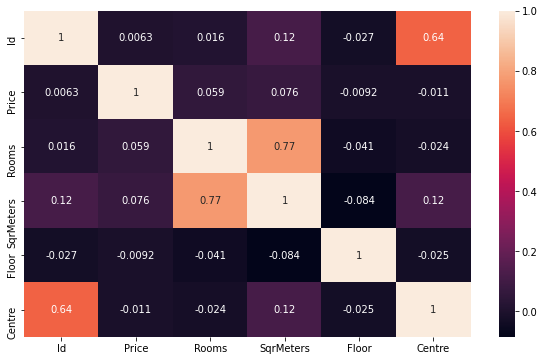

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

---
# **Część 2.** Przygotowanie zbiorów
---

### 2.1. Sprawdzanie czy występują puste pola w naszych danych

In [16]:
df.isnull().sum()

Id             0
Price          0
Rooms          0
SqrMeters      0
Floor          0
Location       0
Centre         0
Description    0
dtype: int64

### 2.2. Usunięcie wszystkich wartości które odstają od reszty

In [17]:
df.drop(df[df.Price >= 2500000].index, inplace=True)

In [18]:
df.drop(df[df['SqrMeters']>=175].index, inplace=True)

In [19]:
df.drop(df[df['Floor']>=12].index, inplace=True)

In [20]:
df

,Id,Price,Rooms,SqrMeters,Floor,Location,Centre,Description
0,3914,386064,2,46.00,3,Poznań Stare Miasto Wilda ul. Maratońska Łęgi ...,1,OFERTA ZWOLNIONA Z PROWIZJI OD KUPUJĄCEGO! OFE...
1,437,280000,2,41.00,5,Poznań Poznań-Wilda,0,Polecam do sprzedaży mieszkanie dwupokojowe pr...
2,1139,329000,2,50.50,1,Poznań Ogrody,0,Polecam na sprzedaż mieszkanie 2-pokojowe na p...
3,4377,225000,2,43.00,10,Poznań Grunwald Łazarz Górczyn Ogrody Je ul. N...,1,BEZPIECZNA TRANSAKCJA JEDYNIE Z DOŚWIADCZONYM ...
4,192,280000,2,69.00,3,Poznań Wilda ul. Traugutta,0,Salon nieruchomości Iron House poleca na sprze...
...,...,...,...,...,...,...,...,...
2013,128,277000,2,46.10,3,Poznań Naramowice Piątkowo Winogrady ul. Sielawy,0,Kupując z pośrednikiem - kupujesz bezpiecznie ...
2014,484,371000,3,47.00,2,Poznań Łazarz ul. Grottgera 15/19,0,Najbardziej Prestiżowy Adres w Poznaniu!! Prze...
2015,795,341600,2,61.00,1,Poznań Poznań-Grunwald ul. Jana Matejki,0,Oferta sprzedaży mieszkania o łącznej powierzc...
2016,1562,149000,1,28.00,3,Poznań Dębiec,0,Kawalerka 28m2 na Dębcu SUPER CENA !!!! Poleca...


### 2.3. Usunięcie niepotrzebnych kolumn

In [21]:
df.drop('Id', axis=1, inplace=True)

In [22]:
df.drop('Location', axis=1, inplace=True)

In [23]:
df.drop('Description', axis=1, inplace=True)

In [24]:
df.drop('Floor', axis=1, inplace=True)

In [25]:
df

,Price,Rooms,SqrMeters,Centre
0,386064,2,46.00,1
1,280000,2,41.00,0
2,329000,2,50.50,0
3,225000,2,43.00,1
4,280000,2,69.00,0
...,...,...,...,...
2013,277000,2,46.10,0
2014,371000,3,47.00,0
2015,341600,2,61.00,0
2016,149000,1,28.00,0


### 2.4. Normalizacja danych (WIP)

In [26]:
df["Price"]=((df["Price"]-df["Price"].min())/(df["Price"].max()-df["Price"].min()))*10

df["Price"]

0       2.508533
1       1.819358
2       2.137747
3       1.461983
4       1.819358
          ...   
2013    1.799865
2014    2.410651
2015    2.219618
2016    0.968155
2017    1.755082
Name: Price, Length: 1998, dtype: float64

### 2.4,5. Bonusowe badanie korelacji

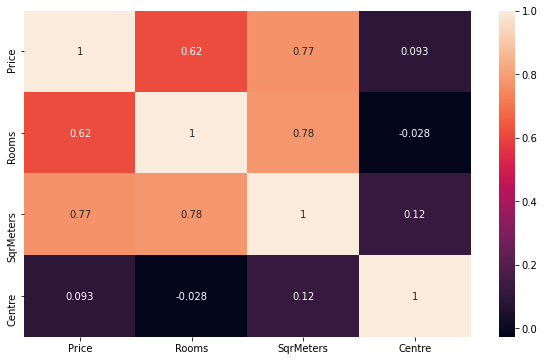

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

### 2.5. Podział na zbiór train i test (4:1)

In [28]:
y = df.Centre

In [29]:
x = df.drop('Centre', axis=1)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2,train_size=0.8, random_state=5)

In [31]:
x_train

,Price,Rooms,SqrMeters
1865,2.371665,3,66.00
1141,1.551547,2,42.64
186,1.428961,2,36.35
1824,1.487974,2,56.10
36,2.514615,3,82.50
...,...,...,...
1156,2.209222,4,70.80
1011,1.224816,1,29.00
1742,2.436642,2,60.00
208,2.079267,3,77.20


In [32]:
y_train.value_counts()

0    1200
1     398
Name: Centre, dtype: int64

---

# **Część 3.** Regresja Logarytmiczna

---

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logisticRegr = LogisticRegression()

### **3.1.** Trening na zbiorach treningowych

In [35]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **3.2.** Sprawdzenie dokładności na podstawie zbiorów testowych

In [36]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.7225


In [37]:
predictions = logisticRegr.predict(x_test)
logisticRegr.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [38]:
 from sklearn.metrics import precision_score

 precision_score(y_test,predictions)
 score

0.7225

### 3.3. precyzja, pokrycie i F-score dla Regresji Logistycznej.

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.73      0.98      0.83       284
           1       0.65      0.09      0.17       116

    accuracy                           0.72       400
   macro avg       0.69      0.54      0.50       400
weighted avg       0.70      0.72      0.64       400



---
# **Część 4.** Klasyfikator Losowy


---

In [40]:
from random import randint

### **4.1.** Stworzenie funkcji do przydzielenia losowej liczby '0' lub '1' dla każdego wektora z x_test.

In [41]:
def randomOut(x_fu):
  temp = len(x_fu.index)
  out = []
  for i in range(temp):
    out.append(randint(0, 1))
  print(out)
  return out

In [42]:
randomClass = randomOut(x_test)

[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 

### 4.2. precyzja, pokrycie i F-score dla Klasyfikatora losowego.

In [43]:
print(classification_report(y_test,randomClass))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58       284
           1       0.27      0.46      0.34       116

    accuracy                           0.48       400
   macro avg       0.48      0.48      0.46       400
weighted avg       0.57      0.48      0.51       400



### **4.2.** Wnioski

Można zauważyć, że dla klasyfikatora losowego uzyskujemy wynik precyzji: **0.48** dla *Macro Average* oraz **0.57** dla *Weighted Average*. A Dokładność **0.48**

A dla modelu regresji logistycznej uzyskujemy wynik precyzji: **0.69** dla *Macro Average* oraz **0.70** dla *Weighted Average*. A Dokładność **0.72**

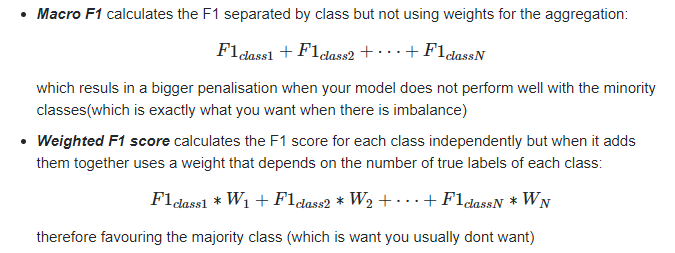


źródło - https://datascience.stackexchange.com/questions/65839/macro-average-and-weighted-average-meaning-in-classification-report, dostęp 08.04.2021

# 5. Bonus (badanie TP, TN, FP i FN dla reg logistycznej) 

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

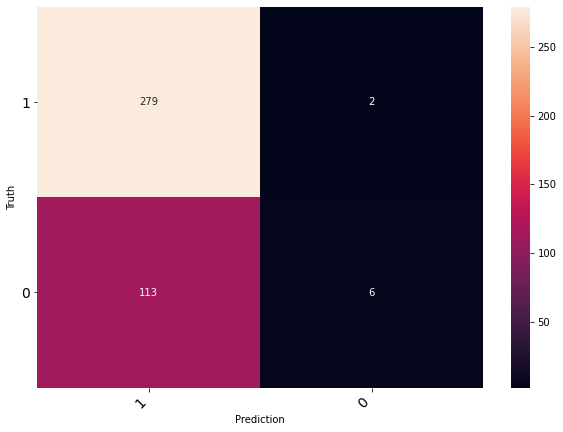

In [ ]:
cm = confusion_matrix(y_test,predictions)
print_confusion_matrix(cm,["1","0"])